In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection  import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.cluster import KMeans
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data= pd.read_csv('/content/IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
Species = data['species'].value_counts().reset_index()
Species

,species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

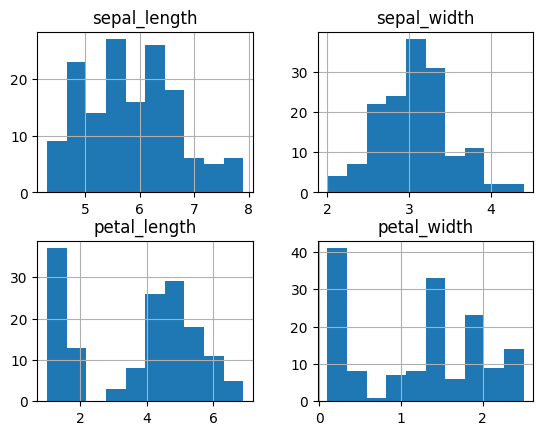

In [ ]:
data.hist()

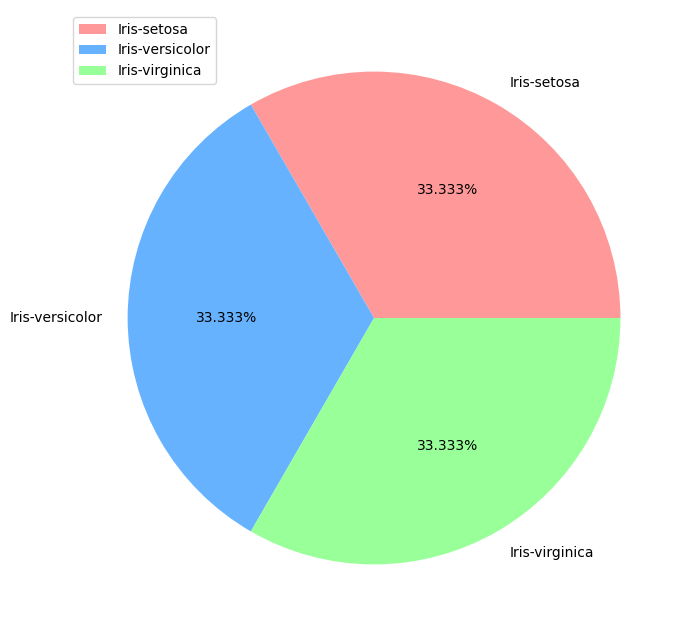

In [ ]:
colors = ['#FF9999', '#66B2FF', '#99FF99']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
plt.figure(figsize=(8, 8))
plt.pie(Species['count'], labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], autopct='%1.3f%%', explode=[0, 0, 0])
plt.legend(loc='upper left')
plt.show()


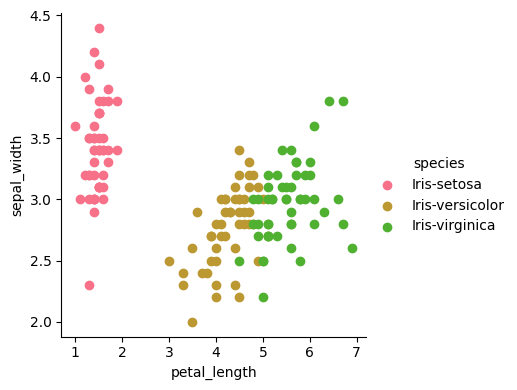

In [ ]:
sns.set_palette("husl")

sns.FacetGrid(data, hue='species', height=4).map(plt.scatter, "petal_length", "sepal_width").add_legend()
plt.show()


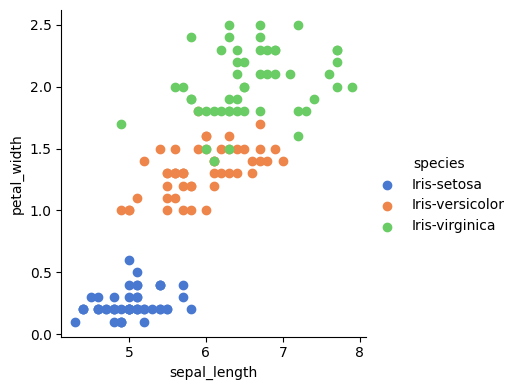

In [ ]:
sns.set_palette("muted")
sns.FacetGrid(data, hue='species', height=4).map(plt.scatter, "sepal_length", "petal_width").add_legend()
plt.show()

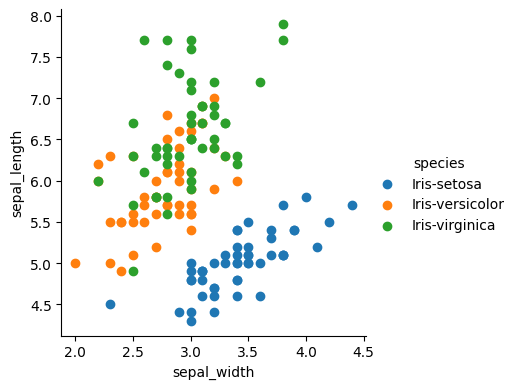

In [ ]:
sns.set_palette("tab10")
sns.FacetGrid(data, hue='species', height=4).map(plt.scatter, "sepal_width", "sepal_length").add_legend()
plt.show()


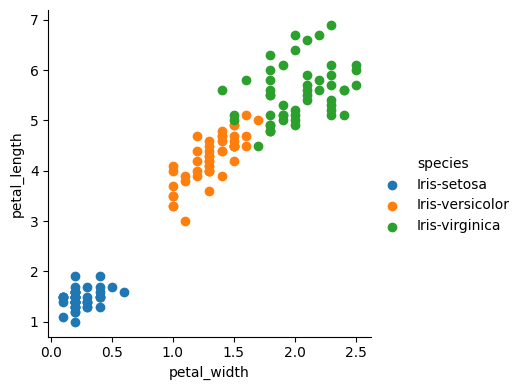

In [ ]:
sns.FacetGrid(data, hue ='species', height = 4).map(plt.scatter,"petal_width","petal_length").add_legend()
plt.show()

In [ ]:
fig = px.scatter_3d(data, x='sepal_length', y='petal_width', z='petal_length', color='species')
fig.show()

In [ ]:
X = data[['petal_length', 'petal_width']]
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
knn_preds = knn_model.predict(X_test)
print(classification_report(y_test, knn_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



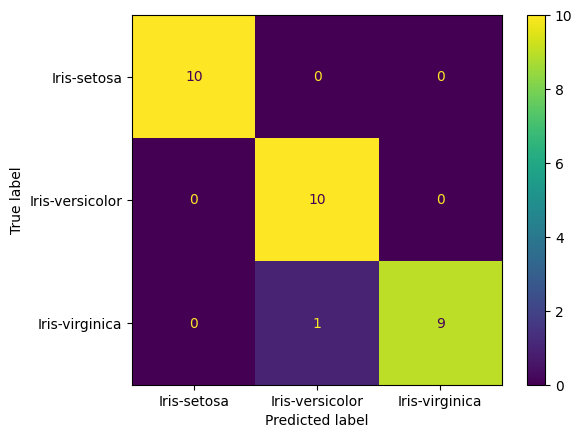

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, knn_preds)